In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
import pandas as pd

# Membaca file produksiPadi.xlsx tanpa filter kolom
df = pd.read_excel('produksiPadi.xlsx')

# Menampilkan nama kolom yang ada di dalam dataframe
print(df.columns)


Index(['Tahun', 'Produksi Padi(Ton)', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')


In [8]:
df.head()

,Tahun,Produksi Padi(Ton),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1970,18693649.0,NaN,NaN,NaN,NaN
1,1971,20483687.0,NaN,NaN,NaN,NaN
2,1972,19393933.0,NaN,NaN,Ubah data tersebut secara lagging,NaN
3,1973,21490578.0,NaN,NaN,NaN,NaN
4,1974,22476073.0,NaN,NaN,Lakukan Split Ratio --> 70 : 30,NaN


In [9]:
df.shape

(53, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tahun               53 non-null     int64  
 1   Produksi Padi(Ton)  53 non-null     float64
 2   Unnamed: 2          0 non-null      float64
 3   Unnamed: 3          0 non-null      float64
 4   Unnamed: 4          7 non-null      object 
 5   Unnamed: 5          2 non-null      object 
dtypes: float64(3), int64(1), object(2)
memory usage: 2.6+ KB


In [11]:
df.describe()

,Tahun,Produksi Padi(Ton),Unnamed: 2,Unnamed: 3
count,53.000000,5.300000e+01,0.0,0.0
mean,1996.000000,4.694139e+07,NaN,NaN
std,15.443445,1.632983e+07,NaN,NaN
min,1970.000000,1.869365e+07,NaN,NaN
25%,1983.000000,3.530311e+07,NaN,NaN
50%,1996.000000,4.937705e+07,NaN,NaN
75%,2009.000000,5.460403e+07,NaN,NaN
max,2022.000000,8.114862e+07,NaN,NaN


In [12]:
df.isnull().sum()

,0
Tahun,0
Produksi Padi(Ton),0
Unnamed: 2,53
Unnamed: 3,53
Unnamed: 4,46
Unnamed: 5,51


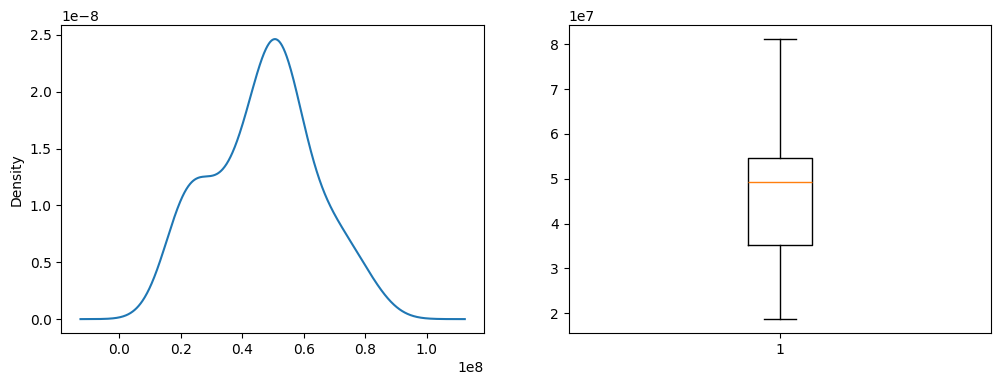

In [22]:
import matplotlib.pyplot as plt

# Memastikan kolom yang relevan, misalnya 'Produksi Padi(Ton)'
f = plt.figure(figsize=(12, 4))

# Subplot pertama - Kernel Density Estimation (KDE) untuk kolom 'Produksi Padi(Ton)'
f.add_subplot(1, 2, 1)
df['Produksi Padi(Ton)'].plot(kind='kde')

# Subplot kedua - Boxplot untuk kolom 'Produksi Padi(Ton)'
f.add_subplot(1, 2, 2)
plt.boxplot(df['Produksi Padi(Ton)'])

# Menampilkan grafik
plt.show()


In [19]:
# Menghapus spasi yang tidak perlu dari nama kolom
df.columns = df.columns.str.strip()

# Cek kembali nama kolom setelah dibersihkan
print(df.columns)


Index(['Tahun', 'Produksi Padi(Ton)', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')


In [20]:
# Menampilkan nama kolom dalam dataframe
print(df.columns)


Index(['Tahun', 'Produksi Padi(Ton)', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')


In [26]:
# Mengecek nilai NaN pada kolom 'Produksi Padi(Ton)'
print(df['Produksi Padi(Ton)'].isnull().sum())

# Menghapus baris dengan nilai NaN
df = df.dropna(subset=['Produksi Padi(Ton)'])

# Atau, mengisi NaN dengan nilai rata-rata
# df['Produksi Padi(Ton)'] = df['Produksi Padi(Ton)'].fillna(df['Produksi Padi(Ton)'].mean())
plt.show()

0


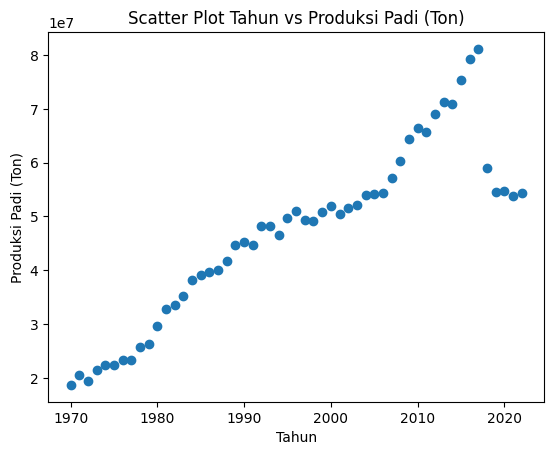

In [27]:
import matplotlib.pyplot as plt

# Membuat scatter plot untuk analisis bivariate antara Tahun dan Produksi Padi(Ton)
plt.scatter(df['Tahun'], df['Produksi Padi(Ton)'])
plt.xlabel('Tahun')
plt.ylabel('Produksi Padi (Ton)')
plt.title('Scatter Plot Tahun vs Produksi Padi (Ton)')
plt.show()


In [29]:
# Mengonversi kolom 'Produksi Padi(Ton)' menjadi numerik
df['Produksi Padi(Ton)'] = pd.to_numeric(df['Produksi Padi(Ton)'], errors='coerce')

# Menghapus baris yang memiliki NaN setelah konversi
df = df.dropna(subset=['Produksi Padi(Ton)'])

# Memeriksa kembali hasilnya
print(df['Produksi Padi(Ton)'].head())


0    18693649.0
1    20483687.0
2    19393933.0
3    21490578.0
4    22476073.0
Name: Produksi Padi(Ton), dtype: float64


In [31]:
#Recall data kita
df.head()

,Tahun,Produksi Padi(Ton),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1970,18693649.0,NaN,NaN,NaN,NaN
1,1971,20483687.0,NaN,NaN,NaN,NaN
2,1972,19393933.0,NaN,NaN,Ubah data tersebut secara lagging,NaN
3,1973,21490578.0,NaN,NaN,NaN,NaN
4,1974,22476073.0,NaN,NaN,Lakukan Split Ratio --> 70 : 30,NaN


In [32]:
# Menggunakan kolom 'Tahun' sebagai x dan 'Produksi Padi(Ton)' sebagai y
x = df['Tahun'].values.reshape(-1, 1)
y = df['Produksi Padi(Ton)'].values.reshape(-1, 1)


In [33]:
#Kedua, kita split data kita menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [34]:
#Ketiga, kita bikin object linear regresi
lin_reg = LinearRegression()

In [35]:
#Keempat, train the model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

LinearRegression()

In [36]:
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[985483.56984309]]
[-1.92002023e+09]


In [37]:
#Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
lin_reg.score(x_test, y_test)

0.8169333952655049

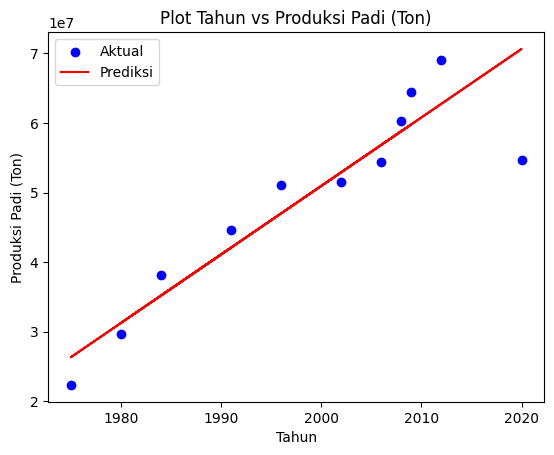

In [38]:
# Menggunakan data testing untuk visualisasi aktual vs prediksi
y_prediksi = lin_reg.predict(x_test)

# Plotting
plt.scatter(x_test, y_test, color='b', label='Aktual')  # Titik aktual
plt.plot(x_test, y_prediksi, c='r', label='Prediksi')  # Garis regresi
plt.xlabel('Tahun')  # Label untuk sumbu X
plt.ylabel('Produksi Padi (Ton)')  # Label untuk sumbu Y
plt.title('Plot Tahun vs Produksi Padi (Ton)')
plt.legend()
plt.show()


In [39]:

lin_reg.predict([[100]])

array([[-1.82147187e+09]])

In [40]:

lin_reg.predict([[150]])

array([[-1.77219769e+09]])

In [41]:
lin_reg.predict([[200]])

array([[-1.72292351e+09]])